In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/Amazon Sale Report.csv")

In [ ]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21261 entries, 0 to 21260
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               21261 non-null  int64  
 1   Order ID            21261 non-null  object 
 2   Date                21261 non-null  object 
 3   Status              21261 non-null  object 
 4   Fulfilment          21261 non-null  object 
 5   Sales Channel       21261 non-null  object 
 6   ship-service-level  21261 non-null  object 
 7   Category            21261 non-null  object 
 8   Size                21261 non-null  object 
 9   Courier Status      21261 non-null  object 
 10  Qty                 21261 non-null  int64  
 11  currency            19967 non-null  object 
 12  Amount              19967 non-null  float64
 13  ship-city           21251 non-null  object 
 14  ship-state          21251 non-null  object 
 15  ship-postal-code    21250 non-null  float64
 16  ship

In [ ]:
print(df.describe())

              index           Qty        Amount  ship-postal-code  New  \
count  21261.000000  21261.000000  19967.000000      21250.000000  0.0   
mean   10626.758055      0.899393    620.536877     463648.212941  NaN   
std     6139.680160      0.344135    271.544879     194558.311520  NaN   
min        0.000000      0.000000      0.000000     110001.000000  NaN   
25%     5308.000000      1.000000    432.000000     380015.000000  NaN   
50%    10629.000000      1.000000    568.000000     500020.000000  NaN   
75%    15944.000000      1.000000    759.000000     600028.000000  NaN   
max    21259.000000     15.000000   5495.000000     989898.000000  NaN   

       PendingS  
count       0.0  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN  


In [ ]:

# Group the data by date and sum the sales amount for each date
sales_over_time = df.groupby('Date')['Amount'].sum().reset_index()

# Display the first few rows of the sales_over_time data
sales_over_time.head()


,Date,Amount
0,04-17-22,49739.80
1,04-18-22,885403.46
2,04-19-22,960055.36
3,04-20-22,1091926.41
4,04-21-22,971966.58


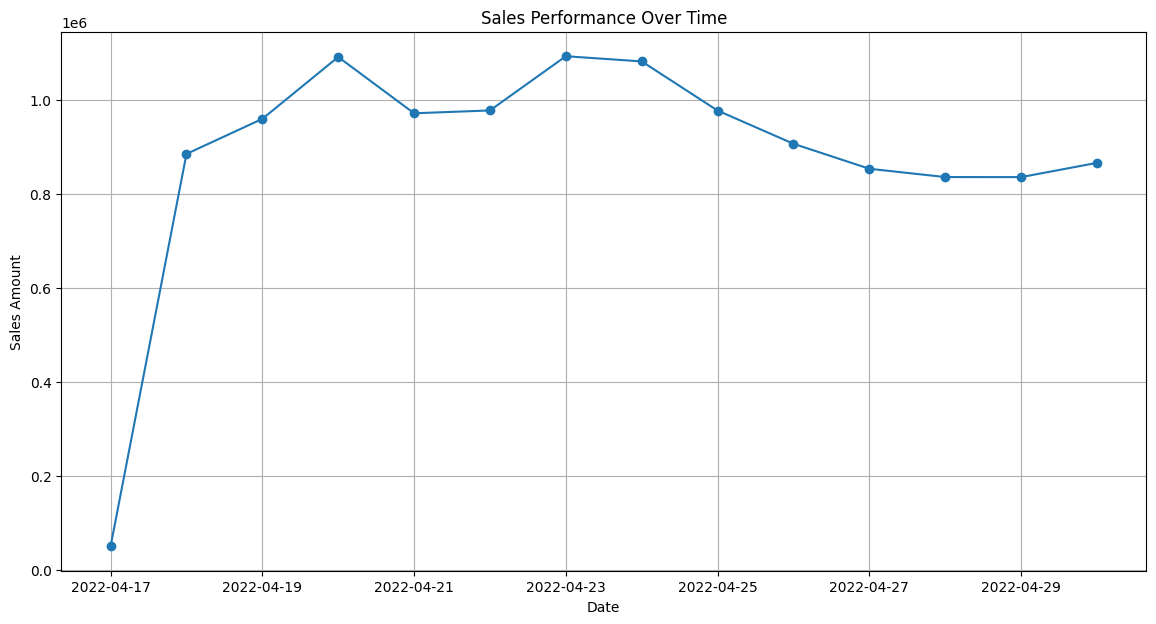

In [ ]:
# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by date to get daily sales
daily_sales = df.groupby('Date').agg({'Amount': 'sum'}).reset_index()

# Plot the daily sales
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(daily_sales['Date'], daily_sales['Amount'], marker='o', linestyle='-')
plt.title('Sales Performance Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.show()


   Category      Amount   Qty
5   T-shirt  6595941.05  7755
2     Shirt  3499544.51  7734
0   Blazzer  1246624.95  1628
6  Trousers   788819.14  1555
1   Perfume   101999.33   128
7    Wallet    86446.64   192
4     Socks    39050.97    95
3     Shoes    31833.24    35


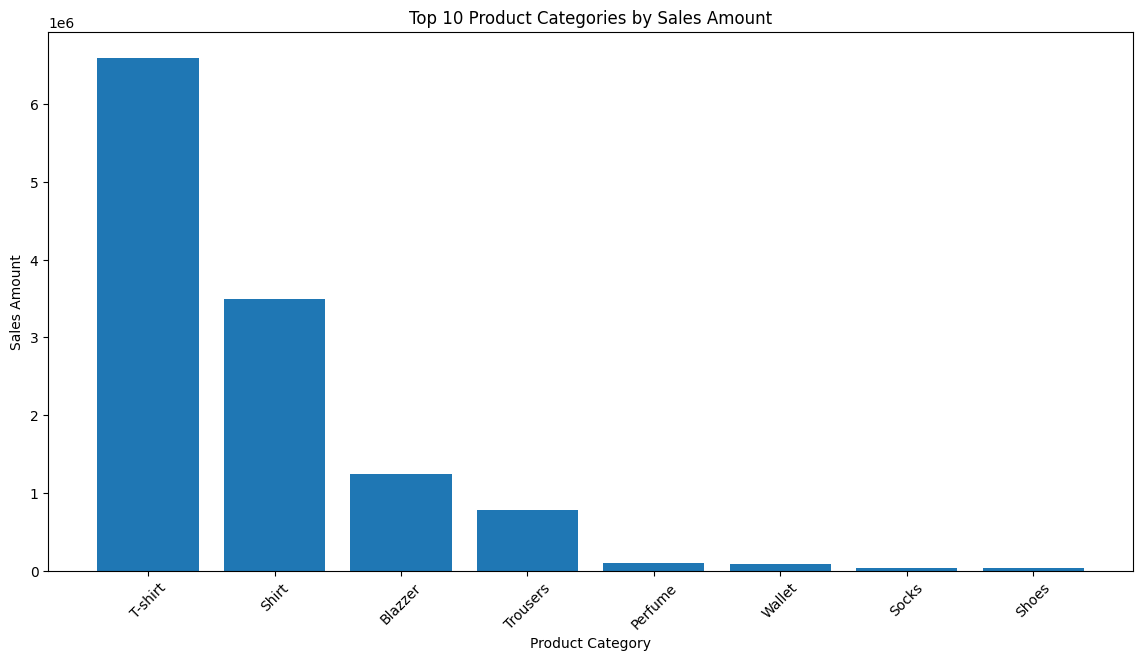

In [ ]:
# Group by product category to get total sales and quantity sold
# Group by product category to get total sales and quantity sold
product_analysis = df.groupby('Category').agg({'Amount': 'sum', 'Qty': 'sum'}).reset_index()

# Sort by sales amount
product_analysis = product_analysis.sort_values(by='Amount', ascending=False)

# Display the top 10 product categories by sales amount
print(product_analysis.head(10))

# Plot the top 10 product categories by sales amount
plt.figure(figsize=(14, 7))
plt.bar(product_analysis['Category'].head(10), product_analysis['Amount'].head(10))
plt.title('Top 10 Product Categories by Sales Amount')
plt.xlabel('Product Category')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()



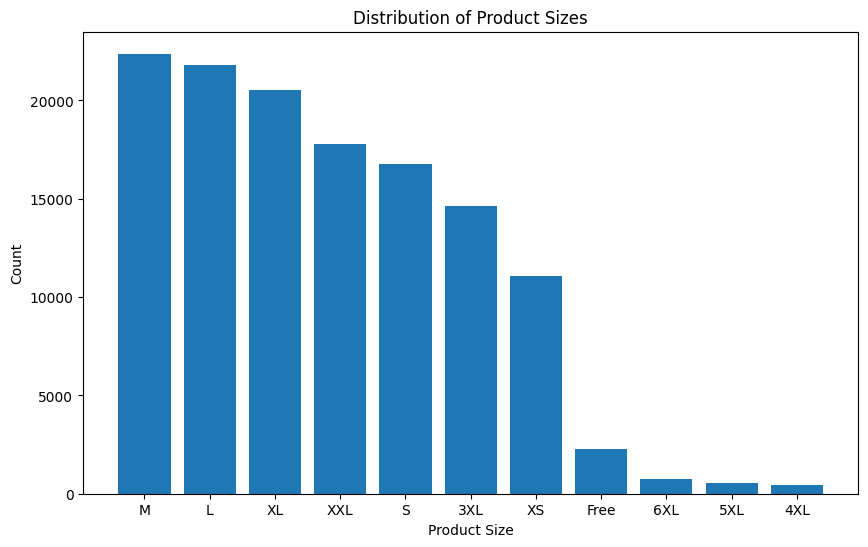

In [ ]:
product_sizes = df['Size'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(product_sizes.index, product_sizes.values)
plt.title('Distribution of Product Sizes')
plt.xlabel('Product Size')
plt.ylabel('Count')
plt.show()


  Fulfillment  Total Sales  Number of Orders
0   Easy Ship  24262630.25             39263


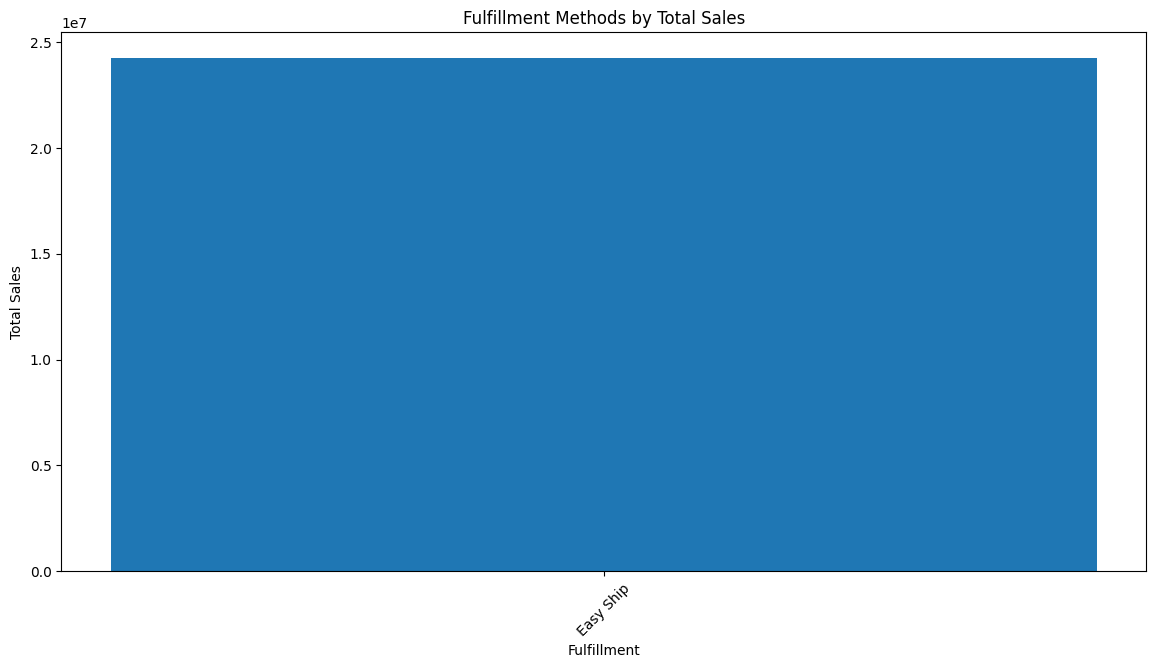

In [ ]:
# Group by fulfillment method to get total sales and number of orders
fulfillment_analysis = df.groupby('fulfilled-by').agg({'Amount': 'sum', 'Order ID': 'count'}).reset_index()

# Rename columns for clarity
fulfillment_analysis.columns = ['Fulfillment', 'Total Sales', 'Number of Orders']

# Display the fulfillment analysis
print(fulfillment_analysis)

# Plot the fulfillment methods by total sales
plt.figure(figsize=(14, 7))
plt.bar(fulfillment_analysis['Fulfillment'], fulfillment_analysis['Total Sales'])
plt.title('Fulfillment Methods by Total Sales')
plt.xlabel('Fulfillment')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


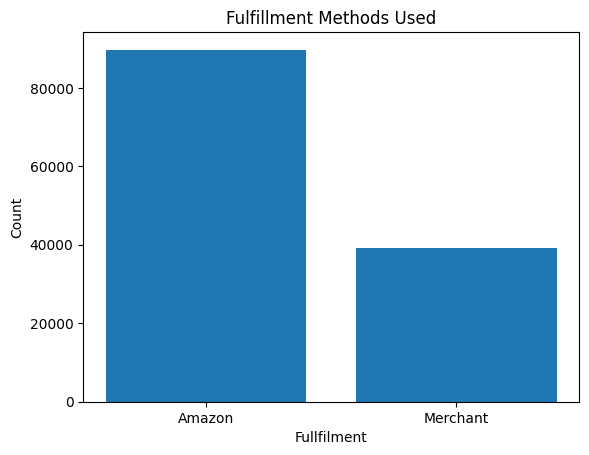

In [ ]:
fulfillment_methods = df['Fulfilment'].value_counts()
plt.bar(fulfillment_methods.index, fulfillment_methods.values)
plt.title('Fulfillment Methods Used')
plt.xlabel('Fullfilment')
plt.ylabel('Count')
plt.show()

        Customer ID  Total Sales  Number of Orders
41872         42039      5584.00                 1
10993         11160      5495.00                 1
24327         24494      4235.72                 1
6132           6215      3112.00                 2
88983         89150      3036.00                 1
121058       121225      2894.00                 1
28647         28814      2864.00                 1
39777         39944      2860.00                 1
79732         79899      2796.00                 1
5135           5209      2776.00                 2


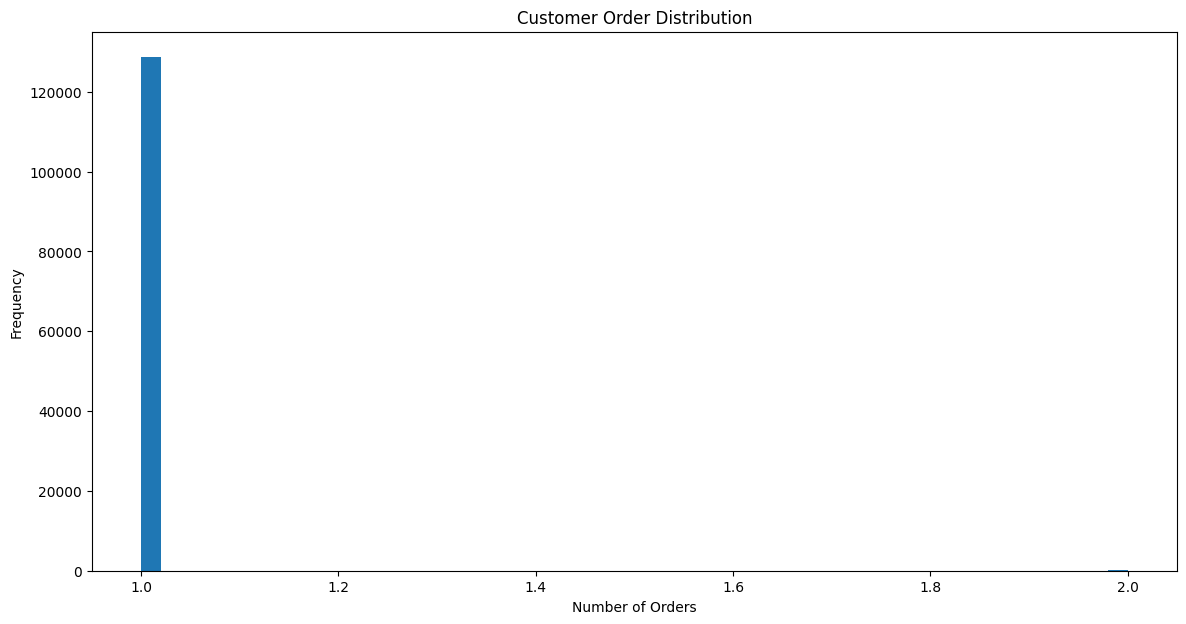

In [ ]:
# Group by customer ID to get total sales and number of orders per customer
customer_segmentation = df.groupby('index').agg({'Amount': 'sum', 'Order ID': 'count'}).reset_index()

# Rename columns for clarity
customer_segmentation.columns = ['Customer ID', 'Total Sales', 'Number of Orders']

# Display the top 10 customers by total sales
print(customer_segmentation.sort_values(by='Total Sales', ascending=False).head(10))

# Plot the number of orders per customer
plt.figure(figsize=(14, 7))
plt.hist(customer_segmentation['Number of Orders'], bins=50)
plt.title('Customer Order Distribution')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()



In [ ]:
customer_behavior = df.groupby('Order ID')['Amount'].sum().sort_values(ascending=False).head(10)
print("Customer buying behavior:")
print(customer_behavior)


Customer buying behavior:
Order ID
408-3363121-6123562    8636.0
405-8750647-4224357    8081.0
403-4288285-8521928    6993.0
404-9932919-6662730    6832.0
408-3317403-1729937    6680.0
408-4410167-4971567    6536.0
405-4755854-9568304    6535.0
406-9002076-4152331    6509.0
171-0706521-2133101    6313.0
402-5239558-4281957    6282.0
Name: Amount, dtype: float64


        ship-state      Amount
22     MAHARASHTRA  2077405.58
18       KARNATAKA  1566577.01
44   UTTAR PRADESH  1124842.43
42       TELANGANA  1041837.11
41      TAMIL NADU   923253.04
9            DELHI   682876.31
19          KERALA   593409.86
47     WEST BENGAL   584793.20
1   ANDHRA PRADESH   483096.81
14         HARYANA   443834.88


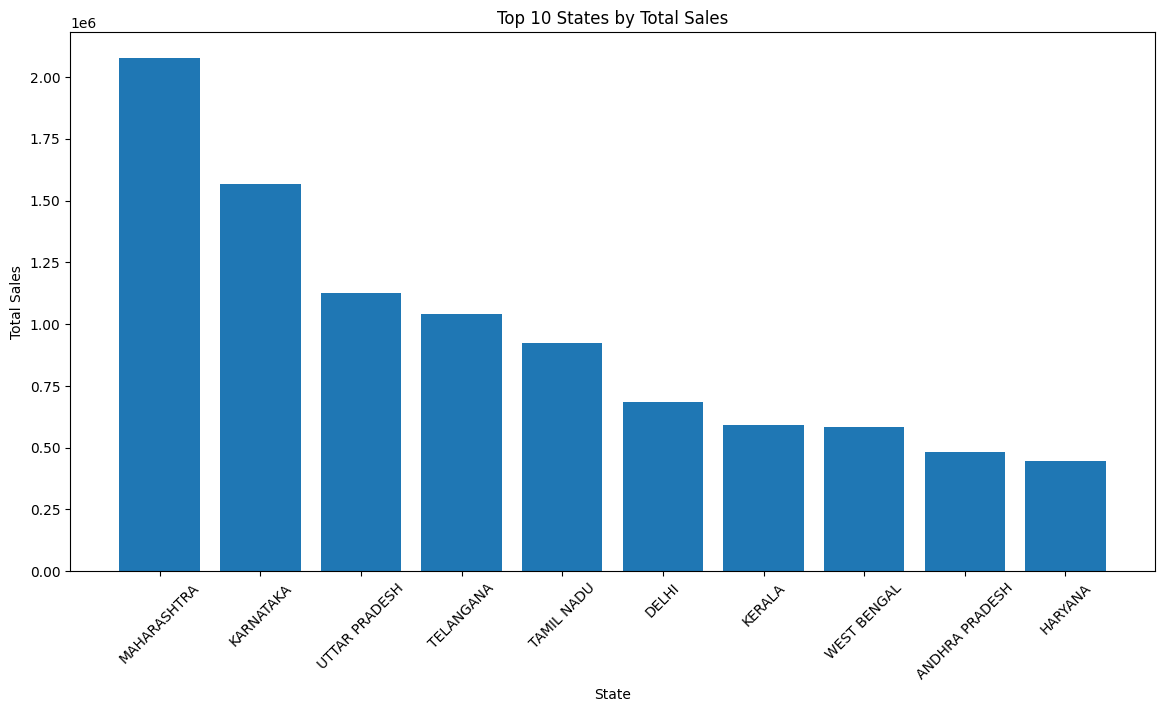

In [17]:
# Group by state and city to get total sales
geographical_analysis = df.groupby(['ship-state', 'ship-city']).agg({'Amount': 'sum'}).reset_index()

# Display the top 10 states by total sales
top_states = geographical_analysis.groupby('ship-state').agg({'Amount': 'sum'}).reset_index().sort_values(by='Amount', ascending=False).head(10)
print(top_states)

# Plot the top 10 states by total sales
plt.figure(figsize=(14, 7))
plt.bar(top_states['ship-state'], top_states['Amount'])
plt.title('Top 10 States by Total Sales')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


      ship-city     Amount
282   BENGALURU  969493.31
1000  HYDERABAD  720007.59
1868  NEW DELHI  587045.81
1671     MUMBAI  564458.17
519     CHENNAI  436248.27
2152       PUNE  382571.67
1308    KOLKATA  249016.69
901    GURUGRAM  171524.31
1517    LUCKNOW  167063.20
2619      THANE  151960.63


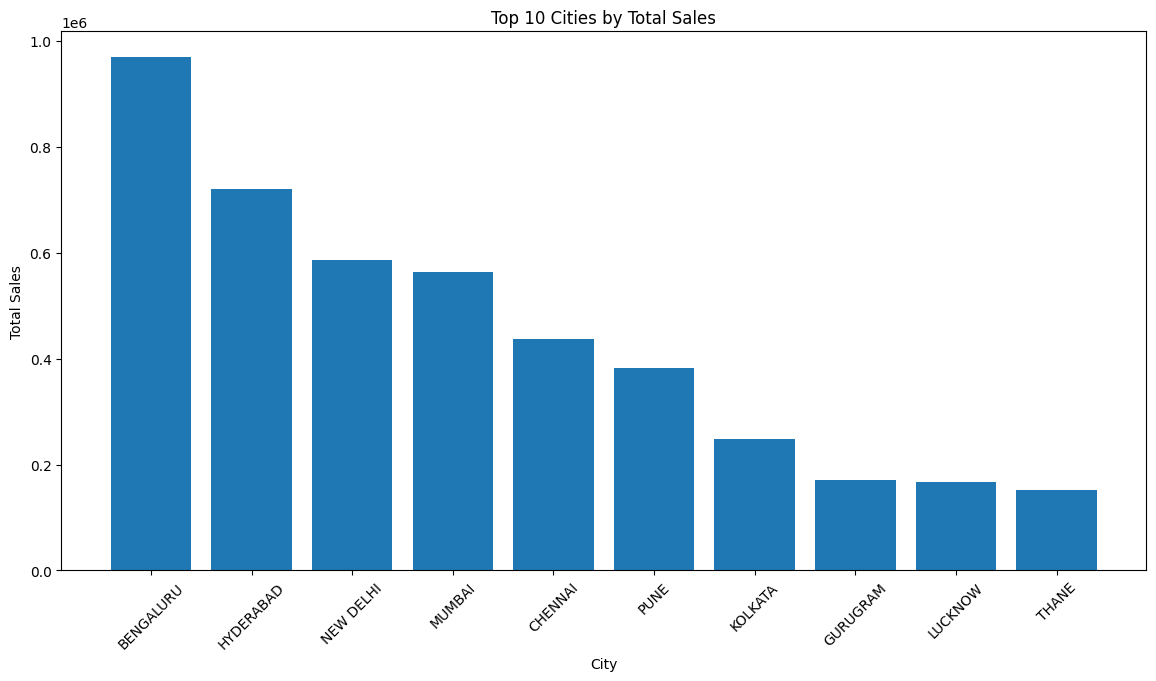

In [18]:
# Group by state and city to get total sales
geographical_analysis = df.groupby(['ship-state', 'ship-city']).agg({'Amount': 'sum'}).reset_index()

# Display the top 10 states by total sales
top_states = geographical_analysis.groupby('ship-city').agg({'Amount': 'sum'}).reset_index().sort_values(by='Amount', ascending=False).head(10)
print(top_states)

# Plot the top 10 states by total sales
plt.figure(figsize=(14, 7))
plt.bar(top_states['ship-city'], top_states['Amount'])
plt.title('Top 10 Cities by Total Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


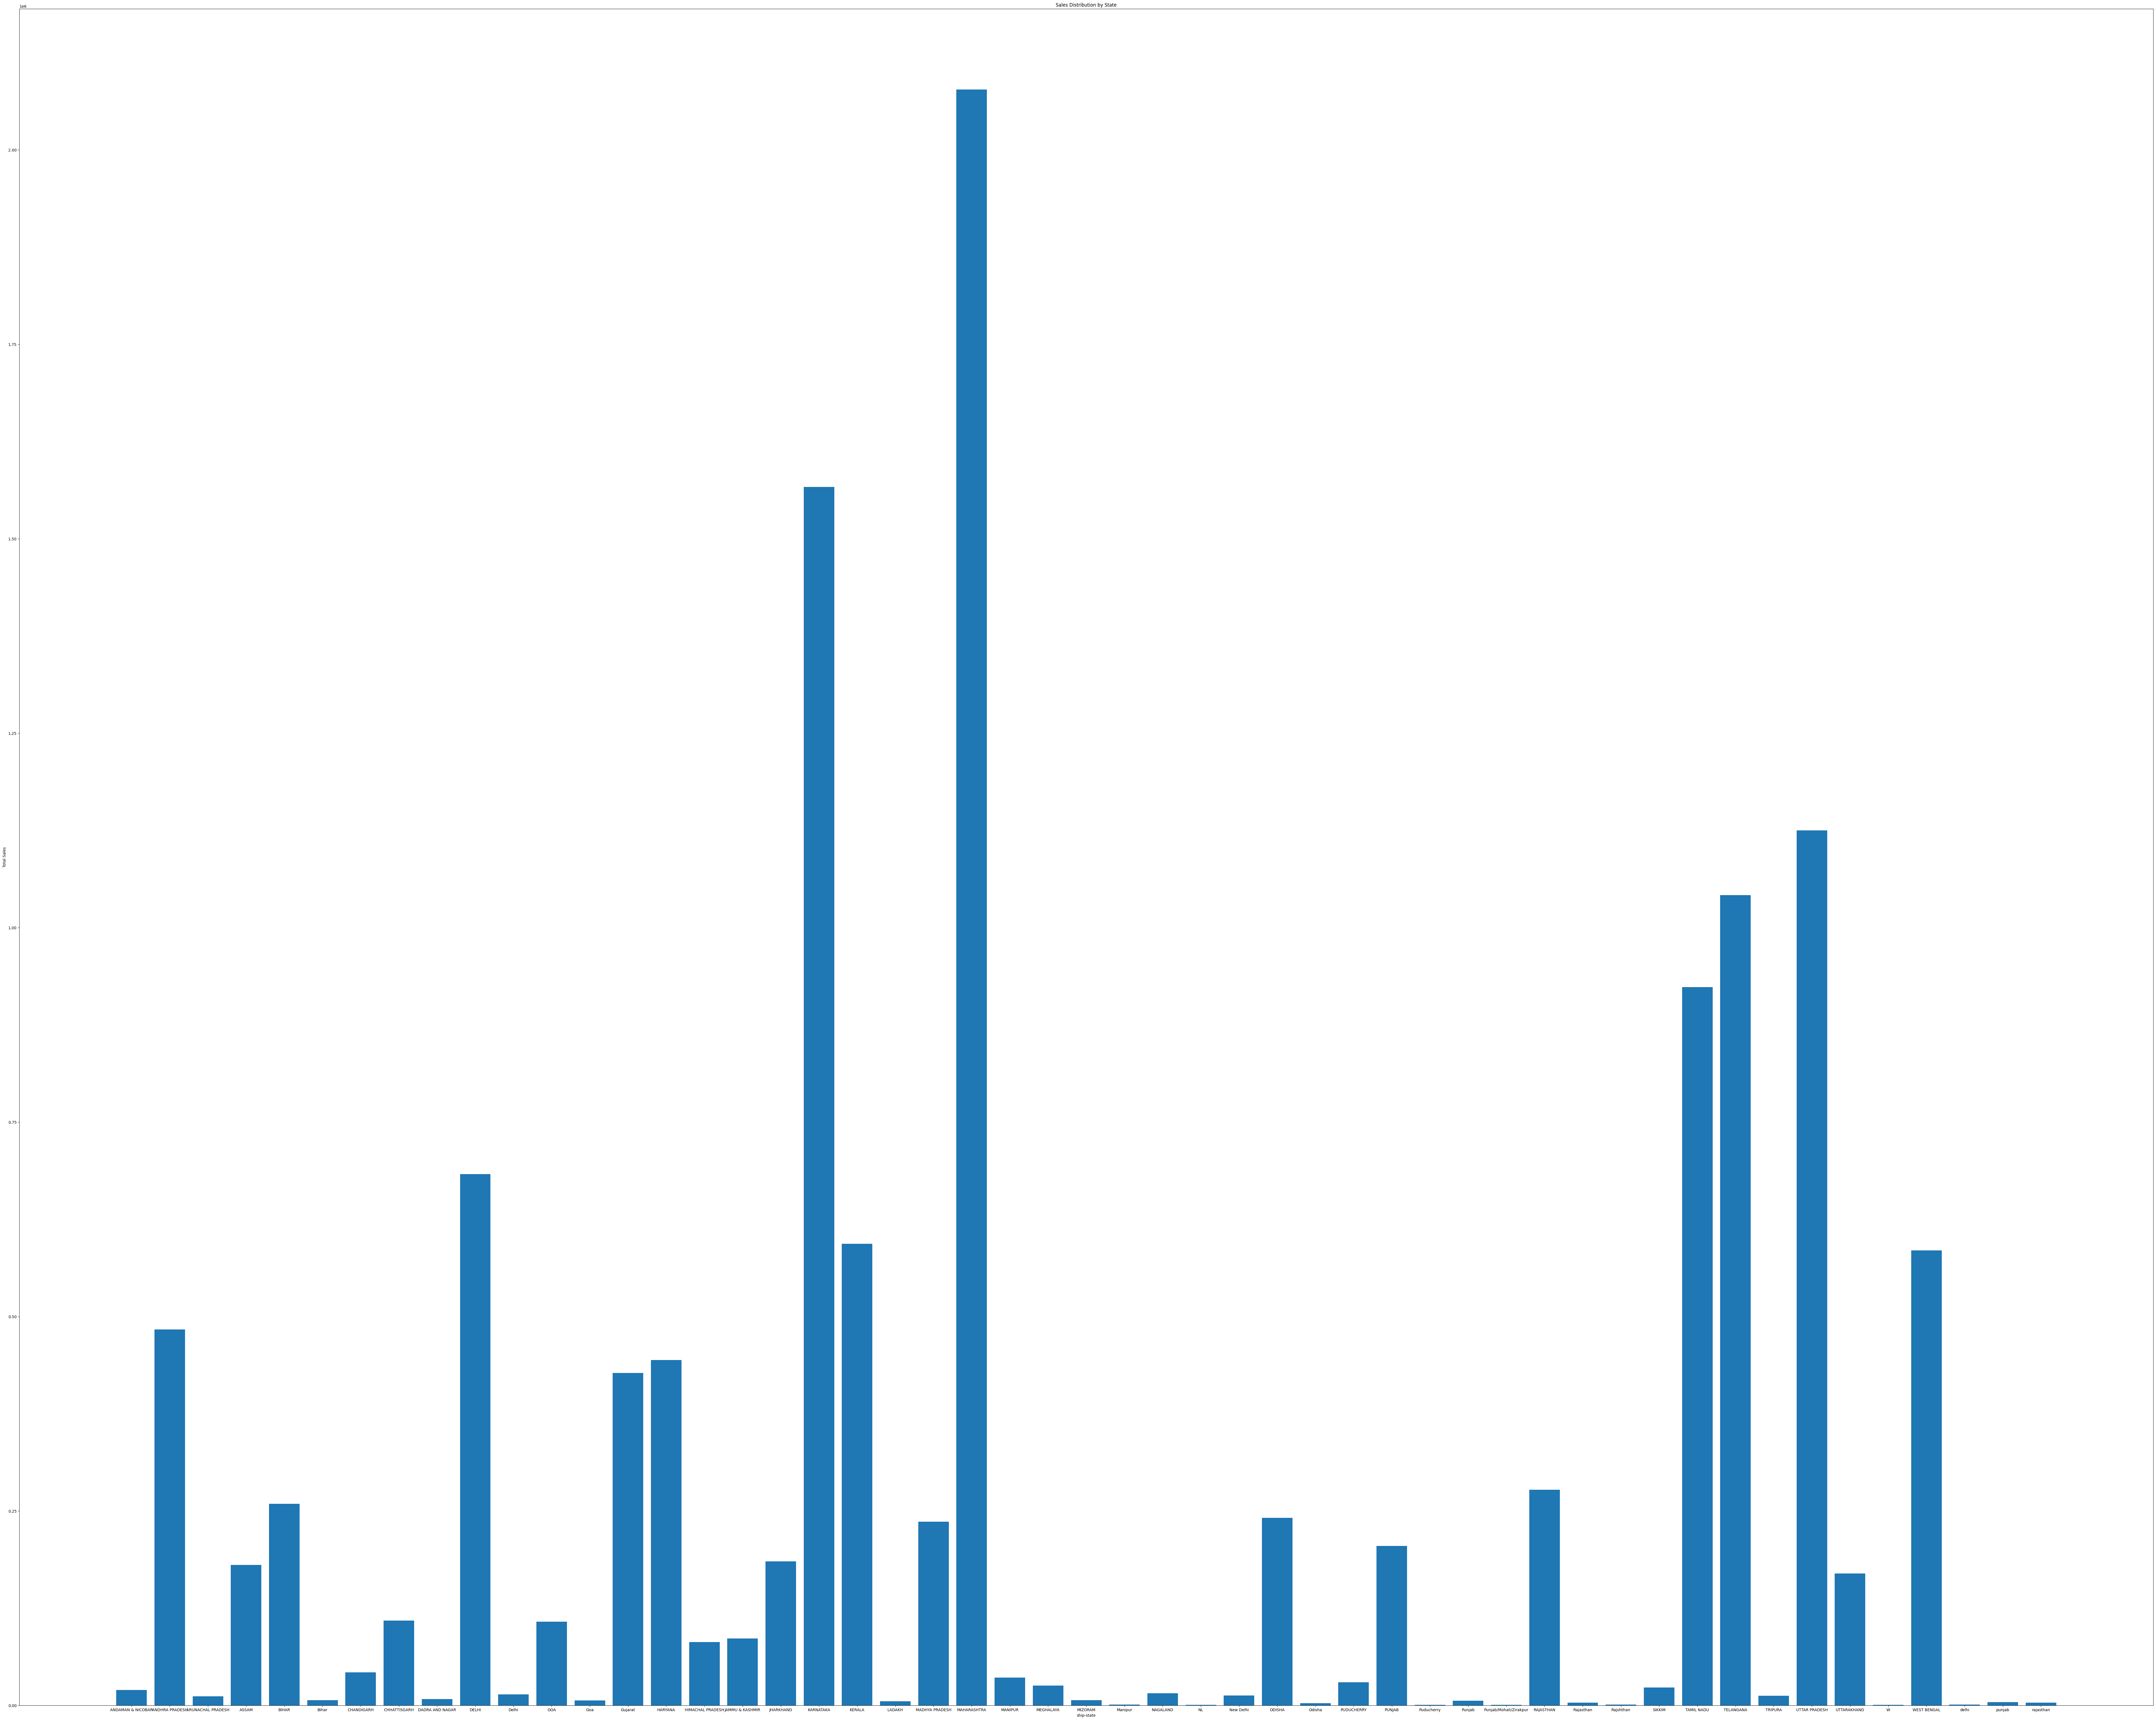

In [19]:
state_sales = df.groupby('ship-state')['Amount'].sum()
plt.figure(figsize=(100,80))
plt.bar(state_sales.index, state_sales.values)
plt.title('Sales Distribution by State')
plt.xlabel('ship-state')
plt.ylabel('Total Sales')
plt.show()


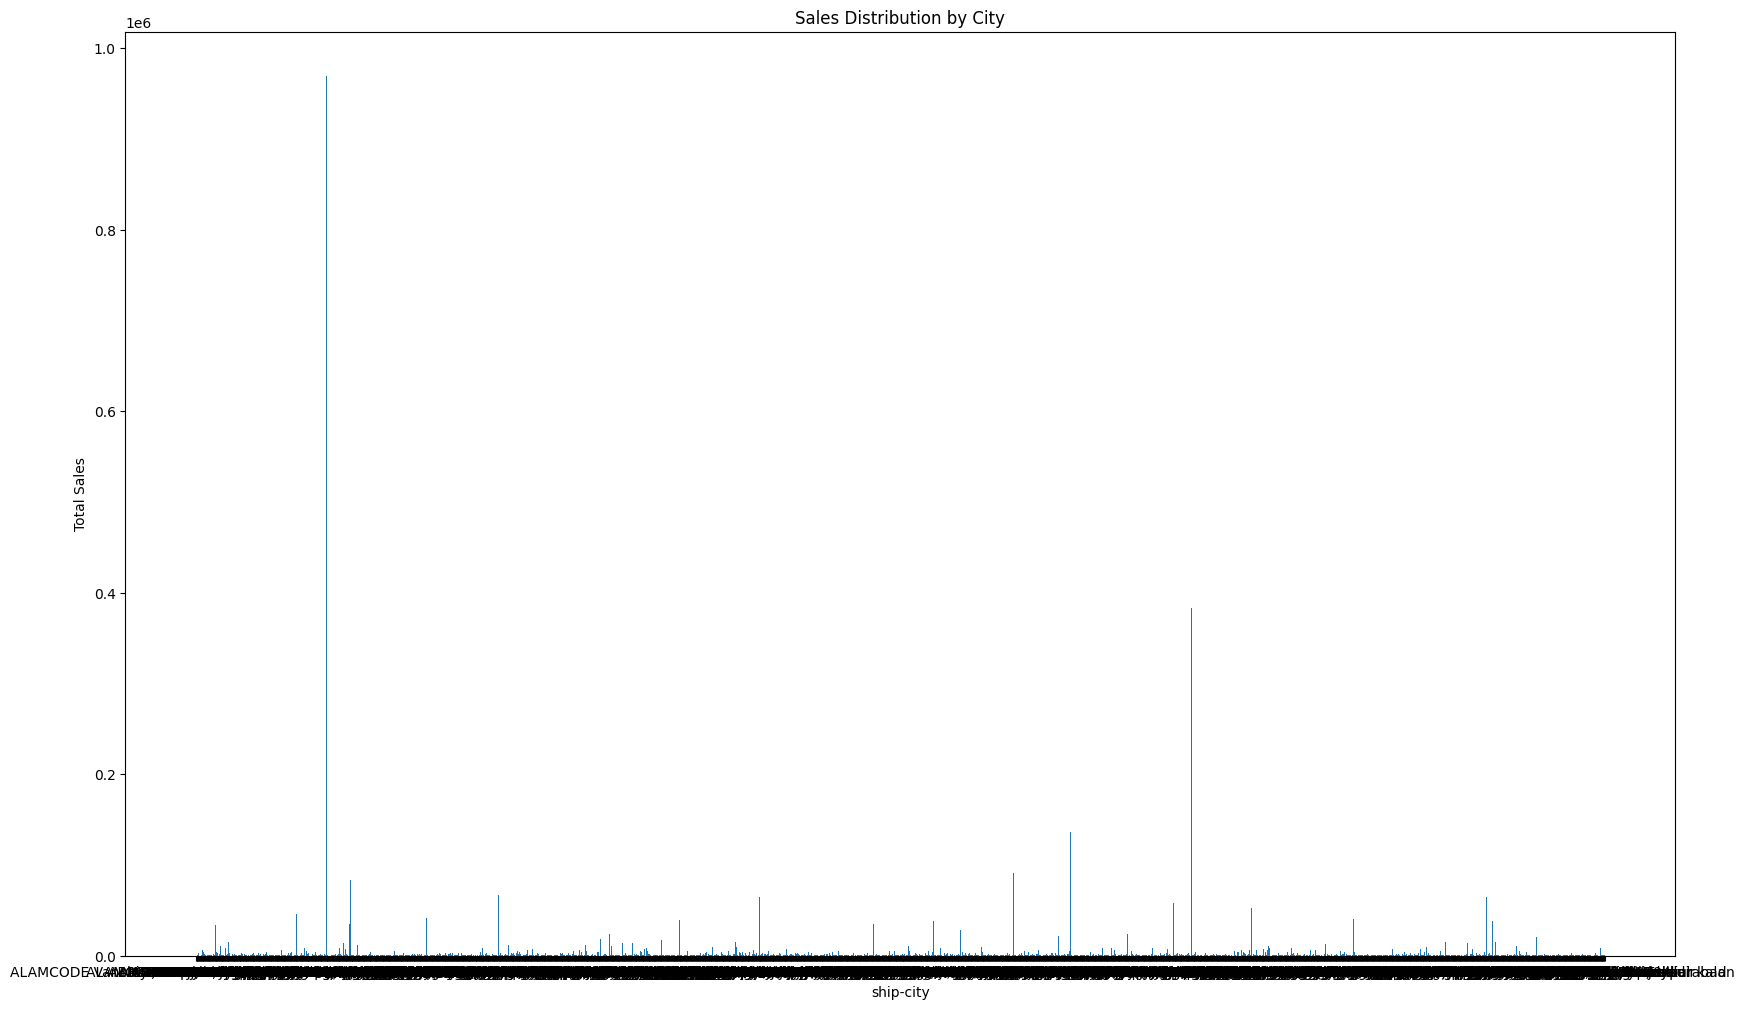

In [16]:
city_sales = df.groupby('ship-city')['Amount'].sum()
plt.figure(figsize=(20,12))
plt.bar(city_sales.index, city_sales.values)
plt.title('Sales Distribution by City')
plt.xlabel('ship-city')
plt.ylabel('Total Sales')
plt.show()
